In [1]:
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Preprocess the data
Давайте взглянем на конкретный пример изображений с помощью matplotlib:

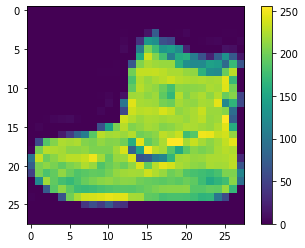

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

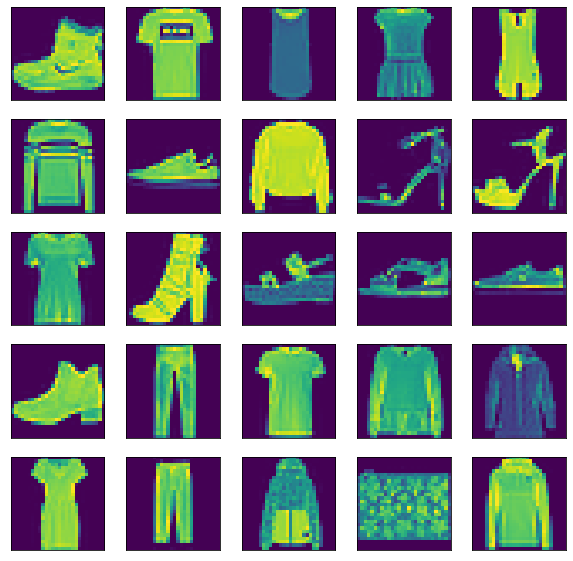

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

Переведем данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

train_images1 = train_images.copy()
train_images2 = train_images.copy()
train_images3 = train_images.copy()
train_images4 = train_images.copy()

Сделаем все оттенки темного черным, а все оттенки светлого - белым.

In [0]:
for i in range(len(train_images1)):
    for x in range(28):
        for y in range(28):
            if train_images1[i][x][y] > 0.5:
                train_images1[i][x][y] = 1
            else:
                train_images1[i][x][y] = 0  

Посмотрим первые 25 изображений:

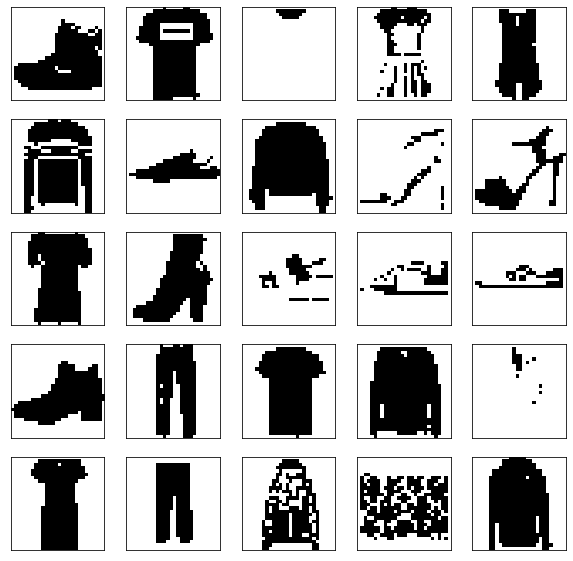

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images1[i], cmap=plt.cm.binary)
plt.show()

реализация сигмоиды

In [0]:
import numpy as np
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

делаем картинки в 4 раза темнее

In [0]:
for i in range(len(train_images2)):
    for x in range(28):
        for y in range(28):
            buf = train_images2[i][x][y]
            train_images2[i][x][y] = sigmoid(buf * 4)  

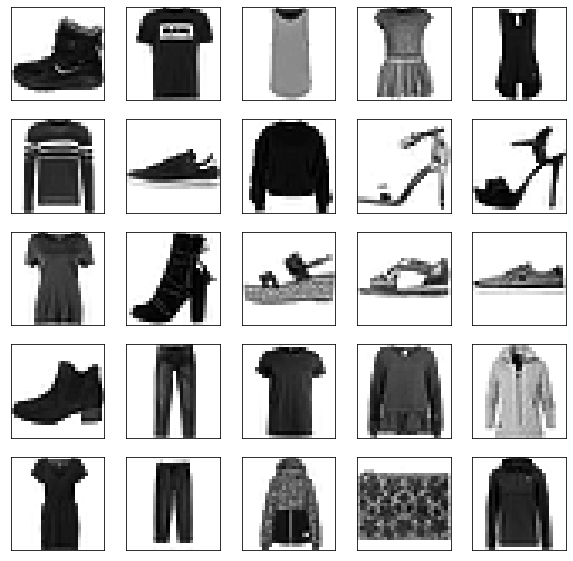

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images2[i], cmap=plt.cm.binary)
plt.show()

делаем картинки в 4 раза светлее

In [0]:
for i in range(len(train_images3)):
    for x in range(28):
        for y in range(28):
            buf = train_images3[i][x][y]
            train_images3[i][x][y] = sigmoid(buf / 4)  

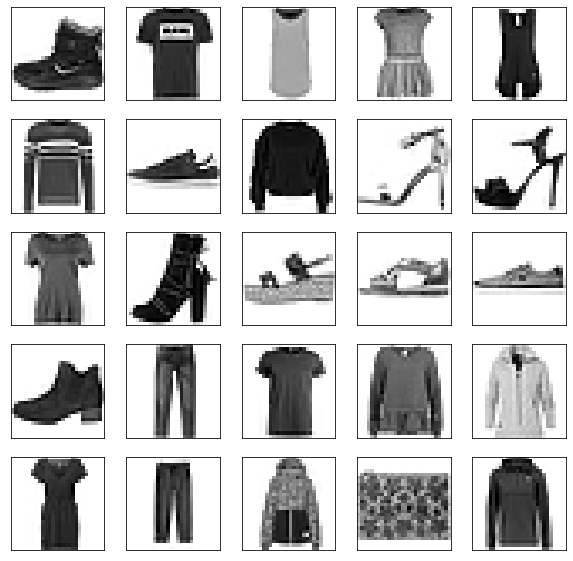

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images3[i], cmap=plt.cm.binary)
plt.show()

повышаем контрастность изображения. делаем все светлые оттенки серого в 2 раза светлее, а все темные оттенки - в 2 раза темнее.

In [0]:
train_images4 = train_images.copy()
for i in range(len(train_images4)):
    for x in range(28):
        for y in range(28):
            buf = train_images4[i][x][y]
            if train_images4[i][x][y] > 0.5:
                train_images4[i][x][y] = sigmoid(buf * 2)  
            else:
                train_images3[i][x][y] = sigmoid(buf / 2)   

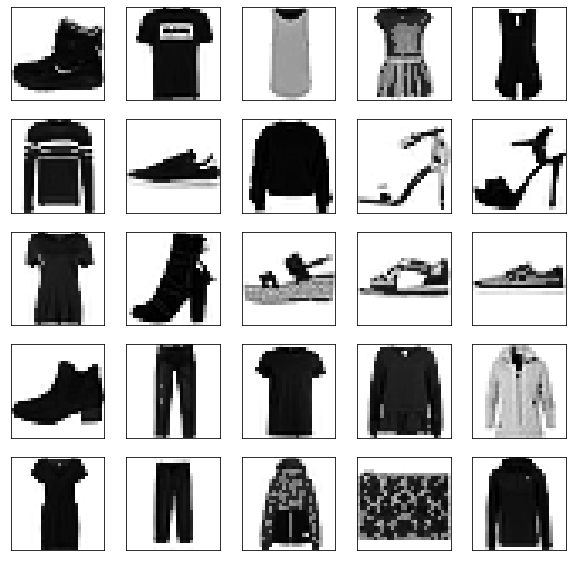

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images4[i], cmap=plt.cm.binary)
plt.show()